In [8]:
from core import initialize_bodies
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [10]:
# initialize bodies with random masses, positions, and velocities over set range
# bodies[n] = Body(mass, position [x, y], velocity [vx, vy])
bodies = initialize_bodies(5, mass_range = [1, 10], position_range = [-25, 25], velocity_range = [-5, 5])

# printing sample values
print(bodies[0].mass)
print(bodies[0].position)
print(bodies[0].velocity)
print(len(bodies))

4.563856298163564
[-18.75148993  18.93076864]
[-1.75135798 -4.96921456]
5


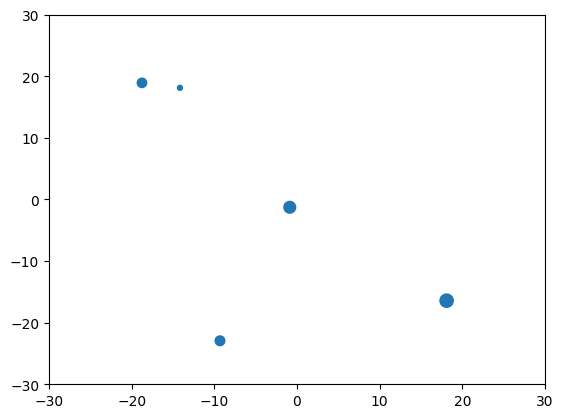

In [21]:
# test animation using matplotlib

fig, ax = plt.subplots()
ax.set_xlim(-30, 30)
ax.set_ylim(-30, 30)
scat = ax.scatter([body.position[0] for body in bodies], [body.position[1] for body in bodies], 
                  s=[body.mass * 10 for body in bodies])  # body size proportional to mass

# code to update positions here

plt.show()